# Mall Customers - Unsupervised Learning


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files 
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [ ]:
cust_data=pd.read_csv("Mall_Customers.csv")
cust_data.dtypes
cust_data=cust_data.drop("CustomerID",axis=1)

In [ ]:
cust_data

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [ ]:
cust_data.isnull().sum()

Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
cust_data["Genre"] = LE.fit_transform(cust_data["Genre"])
print(cust_data["Genre"])

0      1
1      1
2      0
3      0
4      0
      ..
195    0
196    0
197    1
198    1
199    1
Name: Genre, Length: 200, dtype: int64


In [ ]:
cust_data

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


# Data visualization

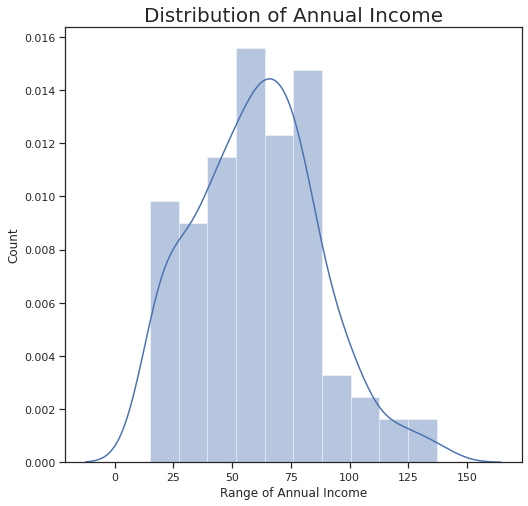

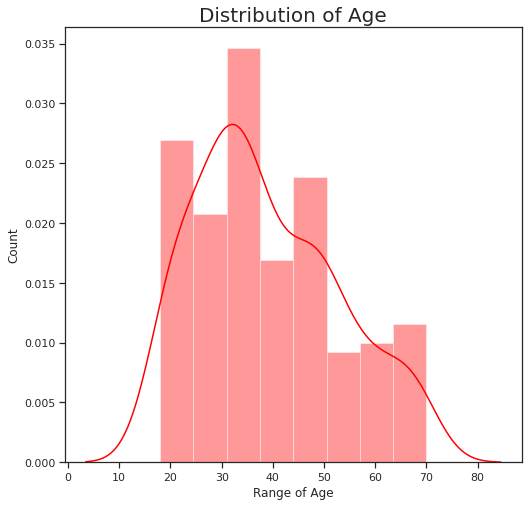

In [ ]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (18, 8)

plt.subplot(1, 2, 1)
sns.set(style = 'ticks')
sns.distplot(cust_data['Annual Income (k$)'])
plt.title('Distribution of Annual Income', fontsize = 20)
plt.xlabel('Range of Annual Income')
plt.ylabel('Count')
plt.show()

plt.subplot(1, 2, 2)
sns.set(style = 'ticks')
sns.distplot(cust_data['Age'], color = 'red')
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')
plt.show()

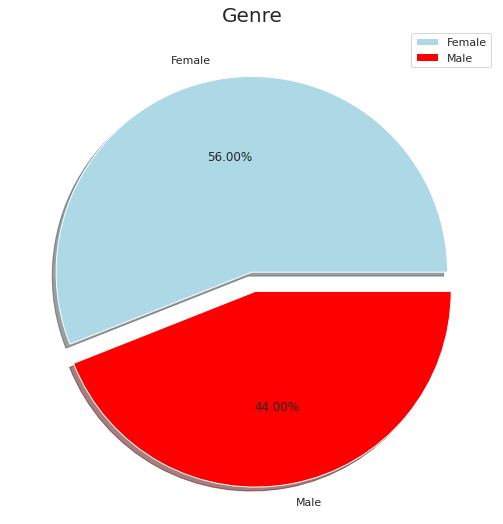

In [ ]:
labels = ['Female', 'Male']
size = cust_data['Genre'].value_counts()
colors = ['lightblue', 'red']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Genre', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()


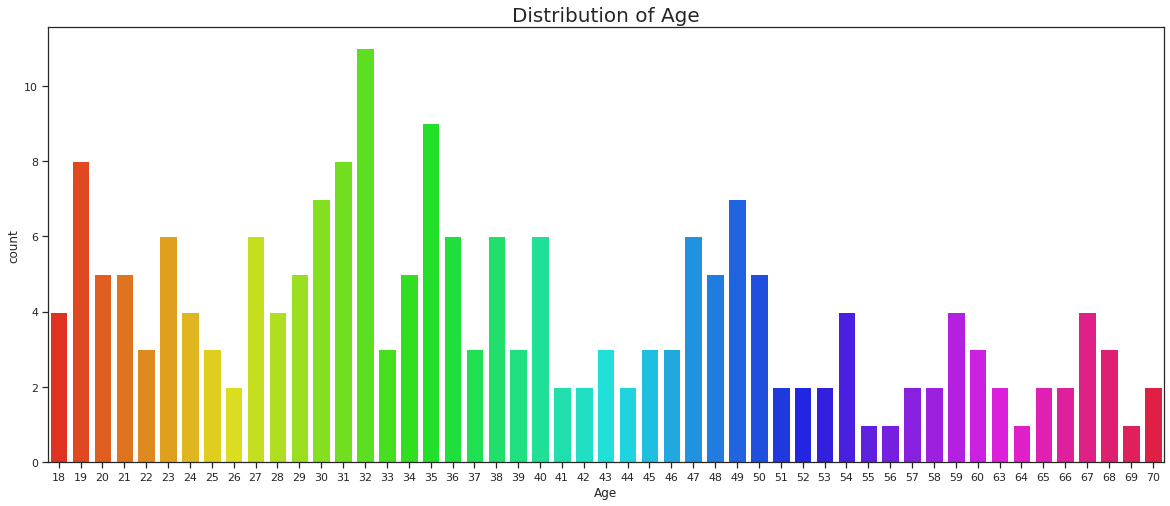

In [ ]:
plt.rcParams['figure.figsize'] = (20, 8)
sns.countplot(cust_data['Age'], palette = 'hsv')
plt.title('Distribution of Age', fontsize = 20)
plt.show()


In [ ]:
from sklearn.decomposition import PCA
pca_reducer = PCA(n_components=2)
reduced_data = pca_reducer.fit_transform(cust_data)
reduced_data
reduced_data.shape


(200, 2)

In [ ]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=5)

cluster = km.fit(reduced_data)


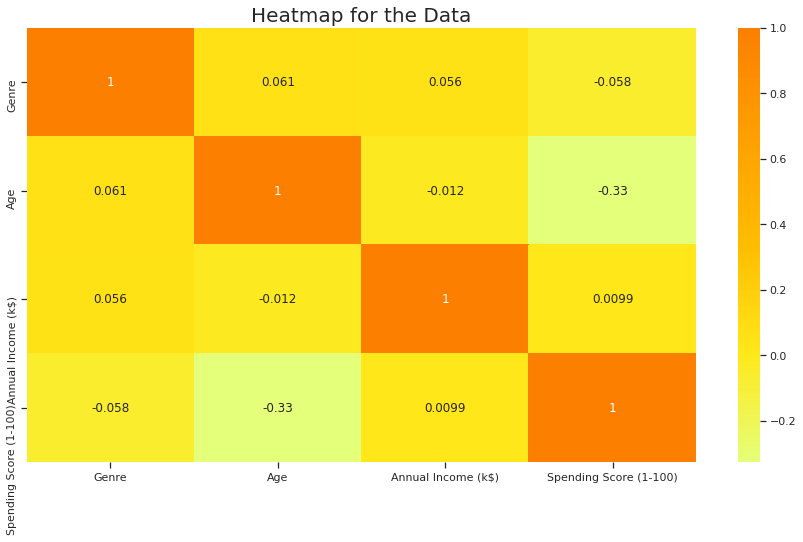

In [ ]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(cust_data.corr(), cmap = 'Wistia', annot = True)
plt.title('Heatmap for the Data', fontsize = 20)
plt.show()

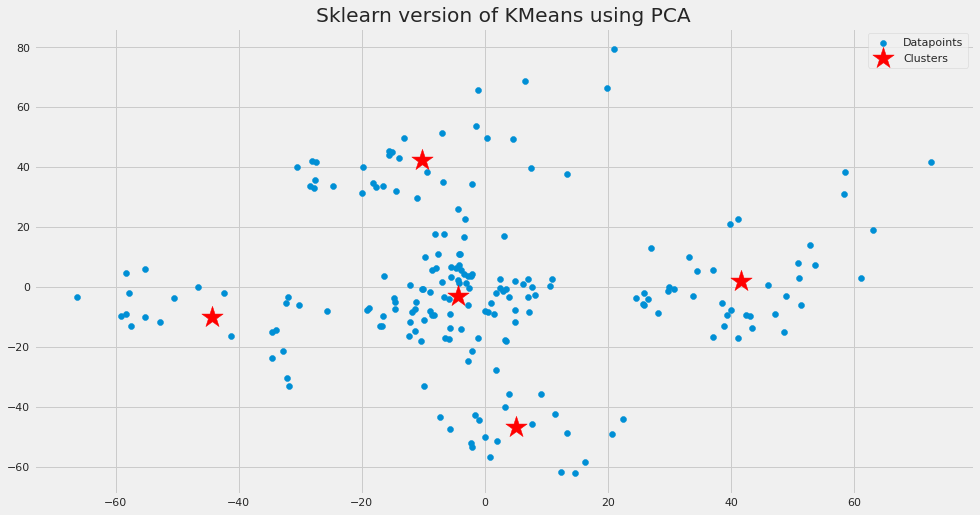

In [ ]:
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], label='Datapoints')
plt.scatter(cluster.cluster_centers_[:, 0], cluster.cluster_centers_[:, 1],marker='*',s=500,c='red',label='Clusters')
plt.title("Sklearn version of KMeans using PCA")
plt.legend()
plt.show()


Here we use elbow method to find the exact no of clusters for explaining the spending score and annual income for mall sales development

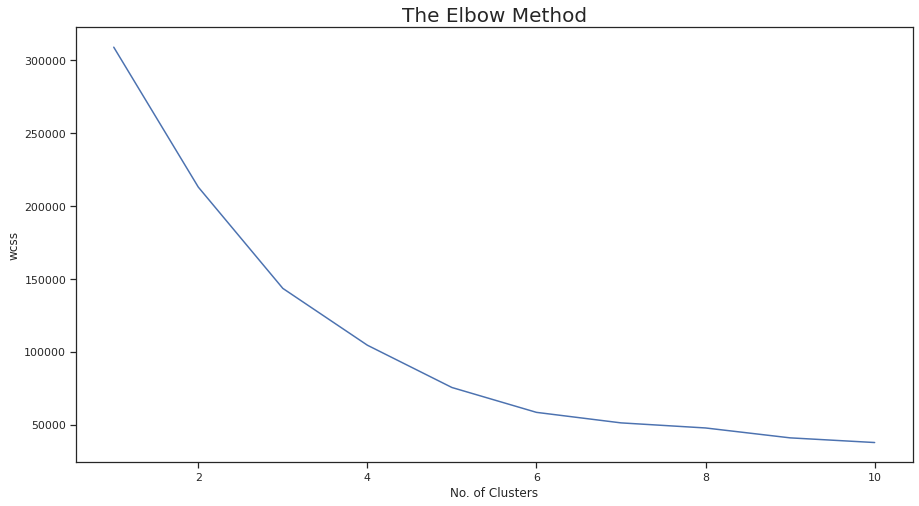

In [ ]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(cust_data)
    wcss.append(km.inertia_)
wcss
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

As we can see from 5th point the curve is dropping more so we take no.of clusters =5
Now we use spendng score and annual income to create the clusters and analyze the data.

In [ ]:
# Making  the independent variables matrix
X = cust_data.iloc[:, [2, 3]].values          #i.e., annual income and spending score
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [ ]:
#Visualizing the clusters
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(X)


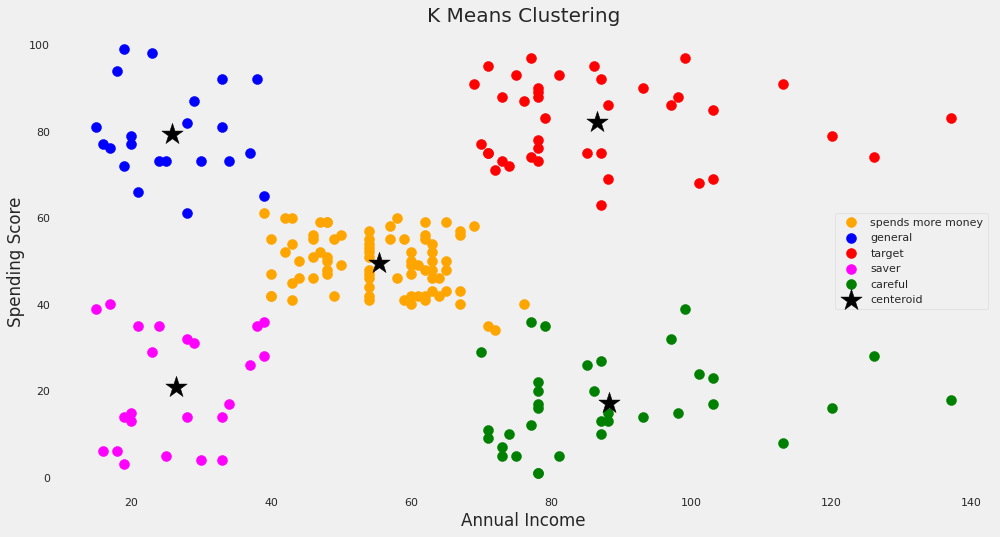

In [ ]:
plt.scatter(X[y_means == 0, 0],X[y_means == 0, 1], s = 100, c = 'orange', label = 'spends more money')
plt.scatter(X[y_means == 1, 0], X[y_means == 1, 1], s = 100, c = 'blue', label = 'general')
plt.scatter(X[y_means == 2, 0], X[y_means == 2, 1], s = 100, c = 'red', label = 'target')
plt.scatter(X[y_means == 3, 0], X[y_means == 3, 1], s = 100, c = 'magenta', label = 'saver')
plt.scatter(X[y_means == 4, 0], X[y_means == 4, 1], s = 100, c = 'green', label = 'careful')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1],marker = '*', s = 500, c = 'black' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()